Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction using SVC(): [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2]


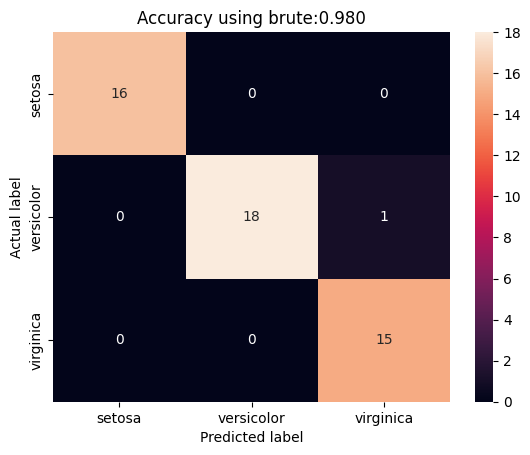

Accuracy of our model is equal 98.0 %.
Recall: 0.971
Precision: 0.971
F1-Measure: 0.971
Prediction using SVC(kernel='linear', random_state=0): [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2]


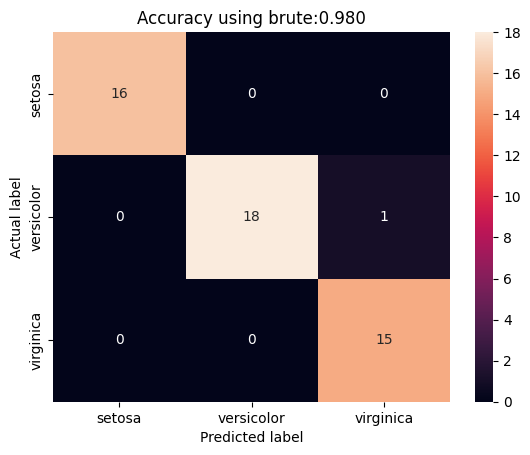

Accuracy of our model is equal 98.0 %.
Recall: 0.971
Precision: 0.971
F1-Measure: 0.971
Prediction using SVC(kernel='poly', random_state=0): [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2]


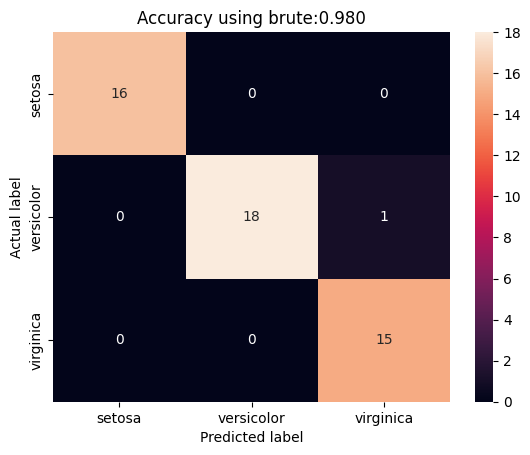

Accuracy of our model is equal 98.0 %.
Recall: 0.971
Precision: 0.971
F1-Measure: 0.971
Prediction using SVC(random_state=0): [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2]


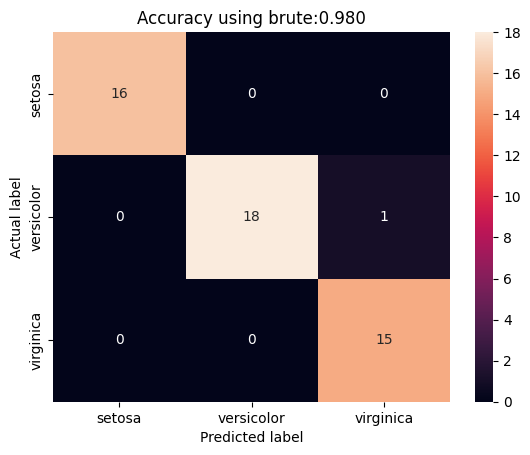

Accuracy of our model is equal 98.0 %.
Recall: 0.971
Precision: 0.971
F1-Measure: 0.971
Prediction using SVC(kernel='sigmoid', random_state=0): [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


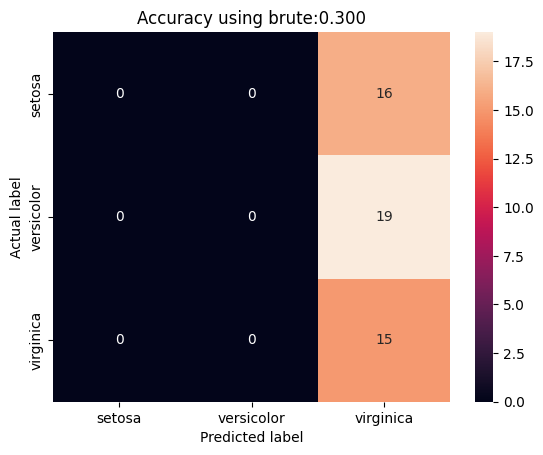

Accuracy of our model is equal 30.0 %.
Recall: 0.441
Precision: 0.300
F1-Measure: 0.357


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/sample_data/Iris.csv')
x=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
y=['Species']
X=data[x]
Y=data[y]
from google.colab import drive
drive.mount('/content/drive')
data
X
Y
data.info()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(Y)
y
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)
X_train
X_test
y_train
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score
from sklearn import tree
from sklearn import metrics
def SVMModel(model, X_train,y_train, X_test):
  model=model
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("Prediction using {}:".format(model), y_pred)

  # Creates a confusion matrix-testing
  cm = confusion_matrix(y_test,y_pred)
  # Transform to df for easier plotting
  cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])

  sns.heatmap(cm_df, annot=True)
  plt.title('Accuracy using brute:{0:.3f}'.format(accuracy_score(y_test,y_pred)))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()

  accuracy = accuracy_score(y_test, y_pred)*100
  print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

  recall = recall_score(y_test, y_pred, labels=[1,2], average='micro')
  print('Recall: %.3f' % recall)

  precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
  print('Precision: %.3f' % precision)

  score = f1_score(y_test, y_pred, labels=[1,2], average='micro')
  print('F1-Measure: %.3f' % score)

from sklearn.svm import SVC
model1 = SVC()
model2 = SVC(kernel = 'linear', random_state = 0)
model3 = SVC(kernel = 'poly', random_state = 0)
model4 = SVC(kernel = 'rbf', random_state = 0)
model5 = SVC(kernel = 'sigmoid', random_state = 0)
m1=SVMModel(model1, X_train,y_train, X_test)
m2=SVMModel(model2, X_train,y_train, X_test)
m3=SVMModel(model3, X_train,y_train, X_test)
m4=SVMModel(model4, X_train,y_train, X_test)
m5=SVMModel(model5, X_train,y_train, X_test)